<h1>Comments on Notebook</h1>
<p>Weak attempt. This sucks. Do not touch it again
This creates bloated data and does not conduct to any lightwieght setup that will be usable in the future. Alas, there are better ways to do that done by people more intelligent.

However: you might be onto something here :) Do not lose faith </p>


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
def process_image(image_path):
    # Open the image file
    img = Image.open(image_path)
    
    # Resize the image to 600x400
    resized_img = img.resize((600, 400))
    
    # Convert the image to a numpy array
    img_array = np.array(resized_img)

    #img_array = img_array.copy().astype('float32') / 255
    
    # Prepare a list to hold all patch tensors
    all_patches = []
    
    # Loop through the image to extract 10x10 patches
    for i in range(0, img_array.shape[0] - 10 + 1, 10):
        for j in range(0, img_array.shape[1] - 10 + 1, 10):
            # Extract the patch
            patch = img_array[i:i+10, j:j+10]
            # Flatten the patch and convert it to a list
            patch_flattened = patch.flatten().tolist()
            # Insert the position (i, j) at the beginning of the list
            patch_tensor = [i, j] + patch_flattened
            # Append the patch tensor to the list of all patches
            all_patches.append(patch_tensor)
    
    # Convert the list of all patches to a numpy array
    final_tensor = np.array(all_patches)
    
    return final_tensor


image_path = '../Image_processing/control_6.jpeg'
result_tensor = process_image(image_path)
print("Shape of the final tensor:", result_tensor.shape)
print(result_tensor)


Shape of the final tensor: (2400, 302)
[[  0   0 228 ... 230 208 229]
 [  0  10 233 ... 233 210 235]
 [  0  20 237 ... 233 209 231]
 ...
 [390 570 224 ... 225 199 236]
 [390 580 221 ... 219 193 230]
 [390 590 220 ... 219 188 203]]


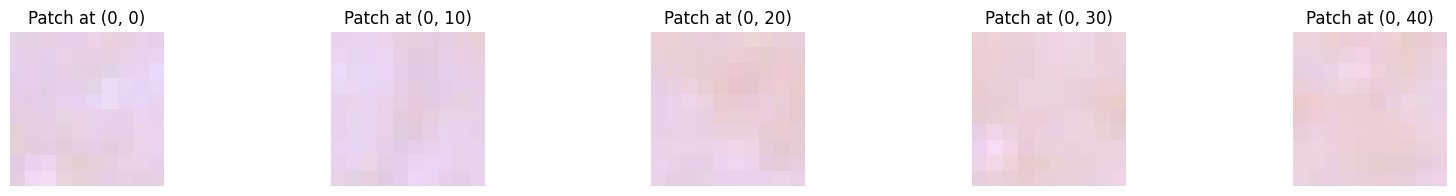

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_patches(tensor, num_patches_to_plot=5):
    # Assuming the image is in RGB, change 3 to 1 if it's grayscale
    patch_size = 10  # Size of the patch
    num_channels = 3  # Number of color channels

    # Create a figure with subplots in a grid
    fig, axes = plt.subplots(1, num_patches_to_plot, figsize=(20, 2))
    
    for i, ax in enumerate(axes.flat):
        if i < len(tensor):
            # Extract the position
            pos_i, pos_j = tensor[i][0], tensor[i][1]
            # Extract the pixel data and reshape
            patch_data = tensor[i][2:].reshape(patch_size, patch_size, num_channels)
            # Plot the image patch
            ax.imshow(patch_data.astype(np.uint8))
            ax.set_title(f"Patch at ({pos_i}, {pos_j})")
            ax.axis('off')
        else:
            ax.axis('off')  # turn off axis if no more images
    
    plt.show()

# Assuming 'result_tensor' is the tensor from the previous processing function
plot_patches(result_tensor)


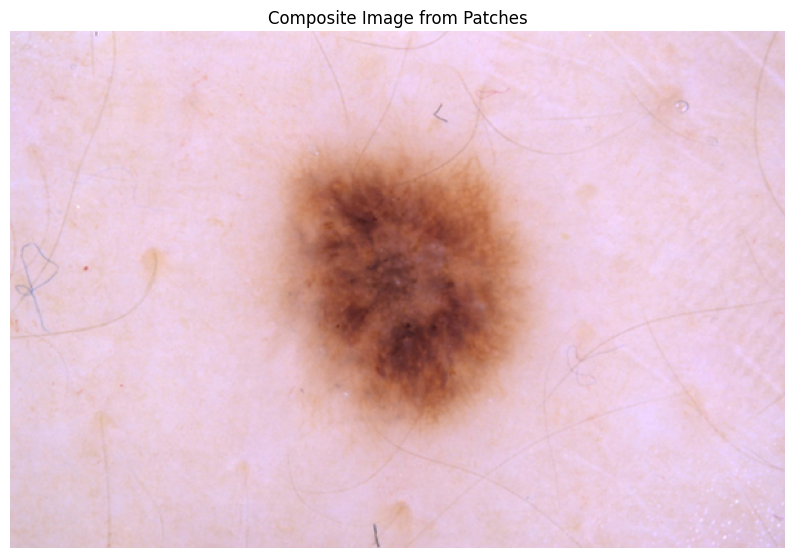

In [4]:
def plot_full_image_from_patches(tensor, original_dims=(400, 600)):
    # Create an empty array to hold the composite image
    # Assuming RGB images, change 3 to 1 if grayscale
    composite_image = np.zeros((original_dims[0], original_dims[1], 3), dtype=np.uint8)
    
    # Dimensions of each patch
    patch_size = 10  
    num_channels = 3  # Assuming RGB, change to 1 if grayscale

    # Iterate through the tensor to place each patch in the correct position
    for patch in tensor:
        pos_i, pos_j = patch[0], patch[1]  # Extract position
        # Extract and reshape the patch data
        patch_data = np.array(patch[2:]).reshape(patch_size, patch_size, num_channels)
        # Place the patch in the composite image
        composite_image[pos_i:pos_i+patch_size, pos_j:pos_j+patch_size, :] = patch_data

    # Plot the full image
    plt.figure(figsize=(10, 8))
    plt.imshow(composite_image)
    plt.axis('off')  # Hide axes
    plt.title("Composite Image from Patches")
    plt.show()

# Assuming 'result_tensor' is the tensor from the previous processing function
plot_full_image_from_patches(result_tensor)


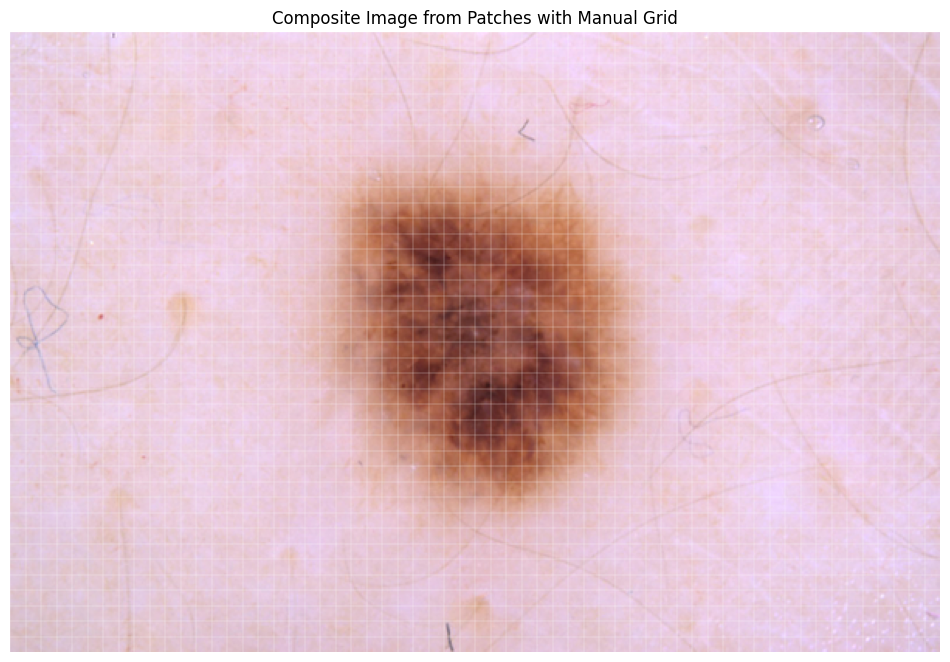

In [5]:
def plot_full_image_from_patches_with_manual_grid(tensor, original_dims=(400, 600), patch_size=10):
    # Create an empty array to hold the composite image
    # Assuming RGB images, change 3 to 1 if grayscale
    composite_image = np.zeros((original_dims[0], original_dims[1], 3), dtype=np.uint8)
    
    # Dimensions of each patch
    num_channels = 3  # Assuming RGB, change to 1 if grayscale

    # Iterate through the tensor to place each patch in the correct position
    for patch in tensor:
        pos_i, pos_j = patch[0], patch[1]  # Extract position
        # Extract and reshape the patch data
        patch_data = np.array(patch[2:]).reshape(patch_size, patch_size, num_channels)
        # Place the patch in the composite image
        composite_image[pos_i:pos_i+patch_size, pos_j:pos_j+patch_size, :] = patch_data

    # Plot the full image with manual grid lines
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.imshow(composite_image)

    # Add grid lines manually
    for x in range(0, original_dims[1], patch_size):
        ax.axvline(x-0.5, color='white', linestyle='-', linewidth=0.2)
    for y in range(0, original_dims[0], patch_size):
        ax.axhline(y-0.5, color='white', linestyle='-', linewidth=0.2)
    
    plt.axis('off')  # Hide axes
    plt.title("Composite Image from Patches with Manual Grid")
    plt.show()

plot_full_image_from_patches_with_manual_grid(result_tensor)


In [93]:
print(result_tensor[1])

[  0  10 176 138 129 175 137 128 173 135 126 174 136 127 175 137 128 177
 139 130 179 141 132 179 141 132 177 139 130 178 140 131 182 144 135 181
 143 134 180 142 133 181 143 134 182 144 135 184 146 137 186 148 139 186
 148 139 184 146 137 184 146 137 195 157 148 195 157 148 194 156 147 196
 158 149 198 160 151 200 162 153 202 164 155 202 163 154 199 161 152 197
 159 150 206 168 159 206 168 159 206 168 159 208 171 162 211 173 164 214
 176 167 216 178 169 215 177 168 212 174 165 210 172 163 209 172 163 211
 173 164 212 174 165 214 176 167 217 179 170 220 182 173 222 184 175 221
 184 175 219 182 173 217 179 170 211 175 166 213 177 168 216 179 170 218
 181 172 221 184 175 224 187 178 226 189 180 225 189 180 223 187 178 220
 183 174 215 179 170 216 181 172 218 183 173 221 185 176 223 188 179 226
 191 181 228 193 183 227 192 182 224 189 179 219 184 174 217 183 173 218
 184 174 219 185 175 222 188 178 224 190 180 226 192 182 228 194 184 227
 193 183 224 190 180 218 184 174 217 184 172 217 18

In [6]:
result_tensor[0].shape

(302,)

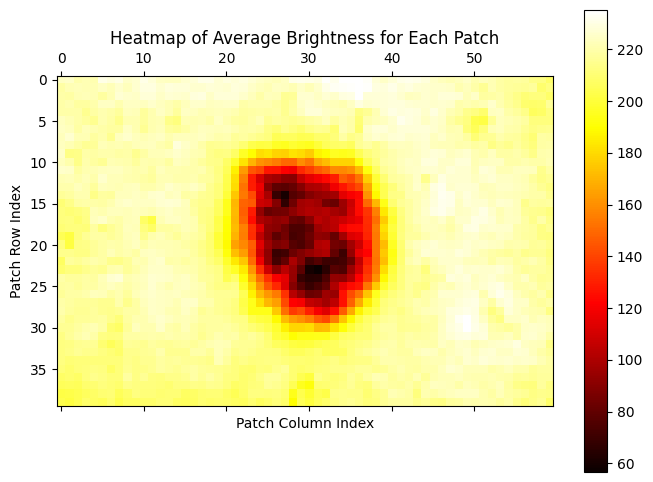

In [7]:
def create_heatmap_from_patches(tensor, original_dims=(400, 600), patch_size=10):
    # Calculate the number of patches along each dimension
    patches_per_row = original_dims[1] // patch_size
    patches_per_column = original_dims[0] // patch_size
    
    # Initialize an array to hold the average brightness of each patch
    heatmap_data = np.zeros((patches_per_column, patches_per_row))

    # Calculate average brightness for each patch
    for patch in tensor:
        pos_i, pos_j = patch[0], patch[1]
        # Convert linear position to grid position
        grid_i, grid_j = pos_i // patch_size, pos_j // patch_size
        # Extract pixel data
        patch_data = np.array(patch[2:])
        # Compute the average brightness
        average_brightness = np.mean(patch_data)
        # Store in heatmap array
        heatmap_data[grid_i, grid_j] = average_brightness

    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.matshow(heatmap_data, cmap='hot')
    fig.colorbar(cax)
    ax.set_title('Heatmap of Average Brightness for Each Patch')
    ax.set_xlabel('Patch Column Index')
    ax.set_ylabel('Patch Row Index')
    plt.show()

create_heatmap_from_patches(result_tensor)


In [8]:
import numpy as np

def separate_channels(tensor):
    # Create lists to hold the data for each color channel
    red_channel = []
    green_channel = []
    blue_channel = []

    # Process each patch tensor in the list
    for patch in result_tensor:
        # Extract the position
        pos_i, pos_j = patch[0], patch[1]
        # Extract the pixel data
        pixel_data = np.array(patch[2:])  # Convert list to numpy array for easier manipulation
        
        # Reshape the pixel data back to (10, 10, 3)
        reshaped_data = pixel_data.reshape(10, 10, 3)
        
        # Separate the channels
        red = reshaped_data[:, :, 0].flatten()  # Red channel
        green = reshaped_data[:, :, 1].flatten()  # Green channel
        blue = reshaped_data[:, :, 2].flatten()  # Blue channel
        
        # Append position and flattened channel data to their respective lists
        red_channel.append([pos_i, pos_j] + red.tolist())
        green_channel.append([pos_i, pos_j] + green.tolist())
        blue_channel.append([pos_i, pos_j] + blue.tolist())

    return np.array(red_channel), np.array(green_channel), np.array(blue_channel)

rgb_tensor=separate_channels(result_tensor[0])

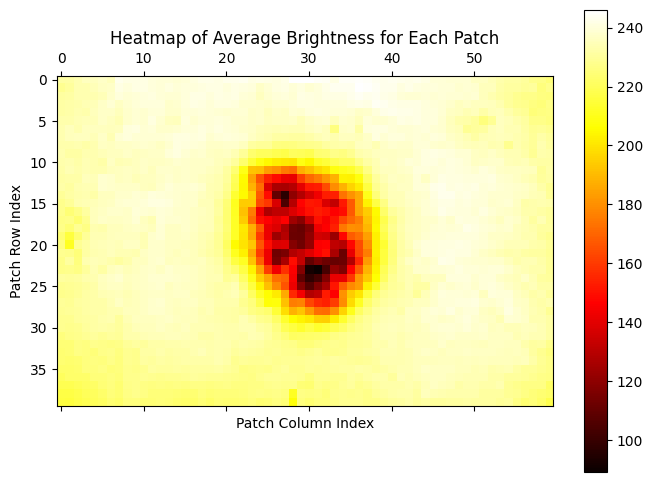

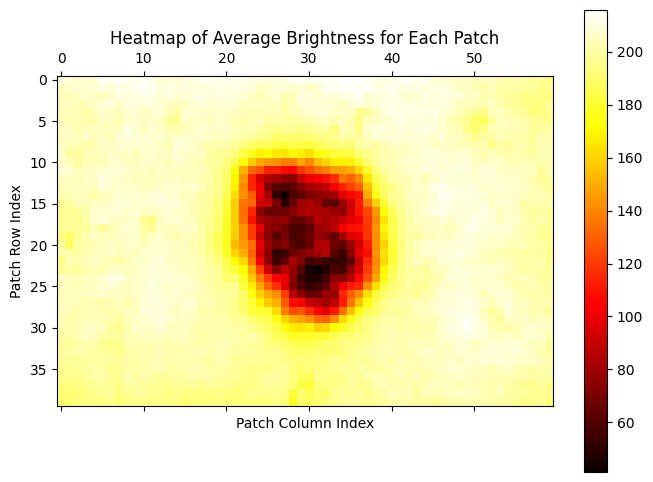

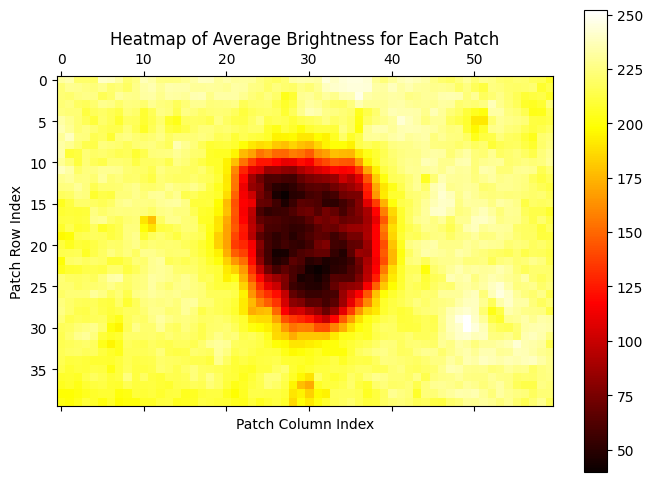

In [9]:
red = create_heatmap_from_patches(rgb_tensor[0])
green = create_heatmap_from_patches(rgb_tensor[1])
blue = create_heatmap_from_patches(rgb_tensor[2])


In [150]:
from collections import defaultdict
import numpy as np

def find_frequent_pairs(patches, sequence_length=2):
    """
    Finds frequent pairs of pixel values in a list of patch data.
    
    Args:
        patches (list of lists): List of patch data arrays.
        sequence_length (int): Should be 2 for pairs.
    
    Returns:
        dict: A dictionary with pairs as keys and their frequencies as values.
    """
    sequence_count = defaultdict(int)
    
    # Iterate over each patch
    for patch in patches:
        # Extract pixel data from each patch
        pixel_data = patch[2:]  # assuming the first two entries are positional data
        # Sliding window to count pairs
        for i in range(len(pixel_data) - sequence_length + 1):
            sequence = tuple(pixel_data[i:i + sequence_length])
            sequence_count[sequence] += 1
    
    return sequence_count

# Example usage:
# Assume `result_tensor` is a list of your tensor patches
patches = result_tensor

# Find frequent pairs
frequent_pairs = find_frequent_pairs(patches)

# Define a threshold for what you consider "frequent"
threshold = 5  # Adjust this based on your analysis
frequent_tokens = {pair: count for pair, count in frequent_pairs.items() if count >= threshold}

print("Frequent pairs and their counts:")
# Convert dictionary to a list of tuples and sort by count (descending order)
sorted_frequent_tokens = sorted(frequent_tokens.items(), key=lambda item: item[1], reverse=True)

# Iterate through the sorted list and print each item
for pair, count in sorted_frequent_tokens:
    print(f"Pair: {pair}, Count: {count}")



Frequent pairs and their counts:
Pair: (193, 165), Count: 1449
Pair: (194, 166), Count: 1429
Pair: (192, 164), Count: 1426
Pair: (225, 194), Count: 1271
Pair: (226, 195), Count: 1247
Pair: (195, 167), Count: 1242
Pair: (224, 193), Count: 1209
Pair: (191, 163), Count: 1179
Pair: (223, 192), Count: 1151
Pair: (227, 196), Count: 1137
Pair: (196, 168), Count: 1107
Pair: (190, 162), Count: 1092
Pair: (234, 202), Count: 1026
Pair: (225, 191), Count: 997
Pair: (232, 200), Count: 989
Pair: (233, 201), Count: 987
Pair: (235, 203), Count: 985
Pair: (231, 199), Count: 979
Pair: (221, 190), Count: 962
Pair: (228, 197), Count: 961
Pair: (222, 191), Count: 953
Pair: (236, 204), Count: 931
Pair: (197, 169), Count: 903
Pair: (230, 198), Count: 901
Pair: (189, 161), Count: 879
Pair: (237, 205), Count: 873
Pair: (191, 164), Count: 871
Pair: (229, 198), Count: 844
Pair: (229, 197), Count: 820
Pair: (188, 160), Count: 816
Pair: (206, 185), Count: 769
Pair: (238, 206), Count: 767
Pair: (228, 196), Count: 7

In [152]:
from collections import defaultdict
import numpy as np

def find_frequent_matrices(result_tensor, submatrix_dim=(4, 4)):
    """
    Finds frequent 4x4 matrices of RGB pixel values in a tensor of tensors.

    Args:
        result_tensor (list of tensors): Each tensor contains position data followed by RGB pixel data.
        submatrix_dim (tuple): Dimensions of the submatrix to search for, default is (4, 4).

    Returns:
        dict: A dictionary with matrices as keys and their frequencies as values.
    """
    sequence_count = defaultdict(int)
    submatrix_rows, submatrix_cols = submatrix_dim

    # Iterate over each tensor (patch) in the result tensor
    for tensor in result_tensor:
        i, j = tensor[0], tensor[1]  # Positional data, may adjust based on your data structure
        pixel_data = tensor[2:]  # Assuming pixel data follows directly after i, j

        # Assuming that pixel_data needs to be reshaped into a 2D matrix of RGB values
        # The reshape parameters need to be determined based on your specific data structure
        # JESUS FU****!!!! What are you doing
        rows, cols = calculate_dimensions_for_patch(pixel_data)
        matrix = np.reshape(pixel_data, (rows, cols, 3))

        # Iterate over each possible position for a 4x4 submatrix
        for row in range(rows - submatrix_rows + 1):
            for col in range(cols - submatrix_cols + 1):
                submatrix = matrix[row:row + submatrix_rows, col:col + submatrix_cols]
                # Convert the submatrix to a hashable form
                submatrix_tuple = tuple(map(tuple, [tuple(map(tuple, submatrix[i])) for i in range(submatrix.shape[0])]))
                sequence_count[submatrix_tuple] += 1

    return sequence_count

def calculate_dimensions_for_patch(pixel_data):
    # This function should return the expected number of rows and columns for reshaping
    # Example static return based on assumed data shape; you'll need to adapt this (don't forget!!)
    return (10, 10)  # Adapt this based on how many pixels per row/column you expect

# Example usage:
frequent_matrices = find_frequent_matrices(result_tensor)

# Define a threshold for what you consider "frequent"
threshold = 5
frequent_tokens = {matrix: count for matrix, count in frequent_matrices.items() if count >= threshold}

print("Frequent 4x4 matrices and their counts:")
sorted_frequent_tokens = sorted(frequent_tokens.items(), key=lambda item: item[1], reverse=True)
for matrix, count in sorted_frequent_tokens:
    print(f"Matrix: {matrix}, Count: {count}")


Frequent 4x4 matrices and their counts:
Matrix: (((225, 191, 164), (225, 191, 164), (225, 191, 164), (225, 191, 164)), ((225, 191, 164), (225, 191, 164), (225, 191, 164), (225, 191, 164)), ((225, 191, 164), (225, 191, 164), (225, 191, 164), (225, 191, 164)), ((225, 191, 164), (225, 191, 164), (225, 191, 164), (225, 191, 164))), Count: 91
Matrix: (((234, 206, 185), (234, 206, 185), (234, 206, 185), (234, 206, 185)), ((234, 206, 185), (234, 206, 185), (234, 206, 185), (234, 206, 185)), ((234, 206, 185), (234, 206, 185), (234, 206, 185), (234, 206, 185)), ((234, 206, 185), (234, 206, 185), (234, 206, 185), (234, 206, 185))), Count: 56
Matrix: (((225, 194, 166), (225, 194, 166), (225, 194, 166), (225, 194, 166)), ((225, 194, 166), (225, 194, 166), (225, 194, 166), (225, 194, 166)), ((225, 194, 166), (225, 194, 166), (225, 194, 166), (225, 194, 166)), ((225, 194, 166), (225, 194, 166), (225, 194, 166), (225, 194, 166))), Count: 35
Matrix: (((226, 195, 167), (226, 195, 167), (226, 195, 167),

In [156]:
import numpy as np

# Assuming 'matrix' is your 4x4 matrix where each element is an RGB tuple
matrix = np.array([[(226, 192, 165), (226, 192, 165), (226, 192, 165), (226, 192, 165)], 
                   [(225, 191, 164), (225, 191, 164), (225, 191, 164), (225, 191, 164)], 
                   [(225, 191, 164), (225, 191, 164), (225, 191, 164), (225, 191, 164)], 
                   [(224, 190, 163), (224, 190, 163), (224, 190, 163), (224, 190, 163)]])

# Separate out the Red, Green, and Blue channels
red_channel = matrix[:,:,0]
green_channel = matrix[:,:,1]
blue_channel = matrix[:,:,2]

# Show the channels
print("Red Channel 4x4 Matrix:")
print(red_channel)
print("\nGreen Channel 4x4 Matrix:")
print(green_channel)
print("\nBlue Channel 4x4 Matrix:")
print(blue_channel)


Red Channel 4x4 Matrix:
[[226 226 226 226]
 [225 225 225 225]
 [225 225 225 225]
 [224 224 224 224]]

Green Channel 4x4 Matrix:
[[192 192 192 192]
 [191 191 191 191]
 [191 191 191 191]
 [190 190 190 190]]

Blue Channel 4x4 Matrix:
[[165 165 165 165]
 [164 164 164 164]
 [164 164 164 164]
 [163 163 163 163]]


In [144]:
from collections import defaultdict
import numpy as np

def find_frequent_pairs(patches, sequence_length=2):
    """
    Finds frequent pairs of pixel values in a list of patch data.
    
    Args:
        patches (list of lists): List of patch data arrays.
        sequence_length (int): Should be 2 for pairs.
    
    Returns:
        dict: A dictionary with pairs as keys and their frequencies as values.
    """
    sequence_count = defaultdict(int)
    
    # Iterate over each patch
    for patch in patches:
        # Extract pixel data from each patch
        pixel_data = patch[2:]  # assuming the first two entries are positional data
        # Sliding window to count pairs
        for i in range(len(pixel_data) - sequence_length + 1):
            sequence = tuple(pixel_data[i:i + sequence_length])
            sequence_count[sequence] += 1
    
    return sequence_count

# Assume `result_tensor` is a list of your tensor patches
patches = result_tensor

# Find frequent pairs
frequent_pairs = find_frequent_pairs(patches)

# Define a threshold for what you consider "frequent"
threshold = 5  # Adjust this based on your analysis
frequent_tokens = {pair: count for pair, count in frequent_pairs.items() if count >= threshold}

# Convert dictionary to a list of tuples and sort by count (descending order)
sorted_frequent_tokens = sorted(frequent_tokens.items(), key=lambda item: item[1], reverse=True)

# Convert the sorted list to a numpy array
# The dtype needs to be set according to the type of the pairs; assuming integer pairs here
frequent_array = np.array(sorted_frequent_tokens, dtype=[('pair', 'i,i'), ('count', 'i')])

# Print the numpy array to confirm
print("Numpy array of frequent pairs and their counts:")
print(frequent_array)


Numpy array of frequent pairs and their counts:
[((193, 165), 1449) ((194, 166), 1429) ((192, 164), 1426) ...
 (( 35,  68),    5) ((147, 201),    5) ((150, 202),    5)]


In [145]:
frequent_array.shape

(25717,)

In [137]:
import numpy as np
import random

def assign_random_values_to_triplets(triplets_array):
    triplet_to_float = {}
    for triplet in triplets_array['triplet']:
        # Ensure unique random value assignment
        while True:
            random_value = random.uniform(0, 1)
            # Round the random value to 5 decimal places
            rounded_value = round(random_value, 5)
            if rounded_value not in triplet_to_float.values():
                triplet_to_float[tuple(triplet)] = rounded_value
                break
    return triplet_to_float

# Assuming 'frequent_array' is your structured array containing frequent triplets
triplet_to_float_map = assign_random_values_to_triplets(frequent_array)

print("Triplet to float map:")
for key, value in triplet_to_float_map.items():
    print(f"{key}: {value:.5f}")


Triplet to float map:
(165, 127, 118): 0.45760
(170, 132, 123): 0.76726
(175, 137, 128): 0.87097
(179, 141, 132): 0.99741
(141, 132, 181): 0.10426
(132, 181, 143): 0.02757
(181, 143, 134): 0.91568
(143, 134, 181): 0.05566
(143, 134, 180): 0.24873
(134, 180, 142): 0.39727
(180, 142, 133): 0.17260
(178, 140, 131): 0.32177
(167, 129, 120): 0.41198
(171, 133, 124): 0.15990
(133, 124, 175): 0.79869
(137, 128, 180): 0.38037
(128, 180, 142): 0.93797
(184, 146, 137): 0.00173
(146, 137, 186): 0.83429
(137, 186, 148): 0.81463
(186, 148, 139): 0.39261
(148, 139, 186): 0.63939
(139, 186, 148): 0.78420
(148, 139, 185): 0.96326
(185, 147, 138): 0.25283
(183, 145, 136): 0.35316
(145, 136, 179): 0.92776
(136, 179, 141): 0.23647
(143, 134, 184): 0.01153
(146, 137, 188): 0.05892
(137, 188, 150): 0.83804
(188, 150, 141): 0.26352
(193, 155, 146): 0.12451
(155, 146, 196): 0.27165
(146, 196, 158): 0.08056
(196, 158, 149): 0.46596
(158, 149, 197): 0.63431
(149, 197, 159): 0.62967
(197, 159, 150): 0.76291
(15

In [139]:
import numpy as np

def replace_triplets_with_floats(tensor, triplet_to_float_map, sequence_length=3):
    modified_tensors = []
    
    for patch in tensor:
        # Extract initial data (like position) and pixel data
        initial_data = patch[:2]
        pixel_data = patch[2:]
        modified_pixel_data = []
        i = 0
        
        while i < len(pixel_data):
            # Extract the current triplet
            triplet = tuple(pixel_data[i:i + sequence_length])
            # Check if the triplet is in the map
            if triplet in triplet_to_float_map:
                # Replace the entire triplet with the corresponding float
                modified_pixel_data.append(triplet_to_float_map[triplet])
                i += sequence_length
            else:
                # Append current value and move to the next
                modified_pixel_data.extend(pixel_data[i:i + sequence_length])
                i += sequence_length
        
        # Create the modified patch by combining the initial data with modified pixel data
        modified_patch = np.concatenate(([initial_data], modified_pixel_data))
        modified_tensors.append(modified_patch)
    
    return np.array(modified_tensors, dtype=object)


# Replace triplets with their mapped floating-point values
modified_tensors = replace_triplets_with_floats(result_tensor, triplet_to_float_map)

# Output the modified tensor
print("Modified tensor:")
for modified_tensor in modified_tensors:
    print(modified_tensor)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [168]:
x = np.array([1,2,34,4,5])
W = np.array([[1,2,34,4,5],[1,2,34,4,5],[1,2,34,4,5]])
y = np.array([12,8,6])
y_pred = np.dot(W,x)
loss = (y_pred - y)
print(loss)

[1190 1194 1196]
